# Sprawozdanie 1
## Tobiasz Szulc

uruchomienie notebooka wymaga dodatkowego kernela do jupytera (xeus-cling (C++17))
program można również uruchomić bez

c++ ex1.cpp ex2.cpp ex3.cpp ex4.cpp common.cpp util.cpp -o sprawozdanie1.out

jako, że xeus nie potrafi załączać zewnętrznych plików cpp wymagane jest ich uprzednie skompilowanie do obiektu współdzielonego
do rysowania wykresów wykorzystywana jest biblioteka gnuplot

In [1]:
!c++ util.cpp -shared -fPIC -o util.so

In file included from util.cpp:5:
gnuplot_i.hpp: In destructor ‘Gnuplot::~Gnuplot()’:
gnuplot_i.hpp:954:9: warning: ‘throw’ will always call ‘terminate’ [-Wterminate]
  954 |         throw GnuplotException("Problem closing communication to gnuplot");
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gnuplot_i.hpp:954:9: note: in C++11 destructors default to ‘noexcept’
gnuplot_i.hpp: In member function ‘bool Gnuplot::file_available(const string&)’:
gnuplot_i.hpp:1874:1: warning: control reaches end of non-void function [-Wreturn-type]
 1874 | }
      | ^


In [2]:
!c++ ex1.cpp ex2.cpp ex3.cpp ex4.cpp common.cpp -shared -fPIC -o ex.so

In [3]:
#pragma cling load("ex.so")
#pragma cling load("util.so")
#include "ex.h"

## Zadanie 1

Podpuknty 1 i 2

policzymy sumę tablicy iteracyjnie

In [4]:
ex1p1and2();

1,2)
	sum = 5030840.5
	v*N = 5312500.0
	błąd bezwzględny sum - v * N = -281659.5
	błąd względny (sum - v*N)/(v*N) = -0.0530


Błąd jest tak duży, dlatego, że w trakcie iteracji wartość akumulatora staje się coraz większa, aż w końcu jest rzędy wielkości większa od wartości którą dodajemy





Podpunkt 3

policzymy sumę tablicy iteracyjnie, co 25000 elementów będziemy wypisywać róźnicę podsumy i podsumy oczekiwanej

wykres wygenerowany pojawi się w osobnym oknie na 10s, załączam również poniżej wykres wygenerowany przeze mnie

In [5]:
ex1p3();

3)
	raport wzrostu błędu
	iteracja / wartość obliczona - wartość oczekiwana
	25000		0.0000000
	50000		0.0000000
	75000		0.0000000
	100000		0.0000000
	125000		0.0000000
	150000		0.0000000
	175000		0.0000000
	200000		0.0000000
	225000		0.0000000
	250000		0.0000000
	275000		0.0000000
	300000		0.0000000
	325000		0.0000000
	350000		0.0000000
	375000		0.0000000
	400000		0.0000000
	425000		0.0000000
	450000		0.0000000
	475000		0.0000000
	500000		0.0000000
	525000		0.0000000
	550000		0.0000000
	575000		0.0000000
	600000		0.0000000
	625000		0.0000000
	650000		0.0000000
	675000		0.0000000
	700000		0.0000000
	725000		0.0000000
	750000		0.0000000
	775000		0.0000000
	800000		0.0000000
	825000		0.0000000
	850000		0.0000000
	875000		0.0000000
	900000		0.0000000
	925000		0.0000000
	950000		0.0000000
	975000		0.0000000
	1000000		-409.5000000
	1025000		-1190.7500000
	1050000		-1972.0000000
	1075000		-2753.2500000
	1100000		-3534.5000000
	1125000		-4315.7500000
	1150000		-5097.0000000
	1175000		-5878.250

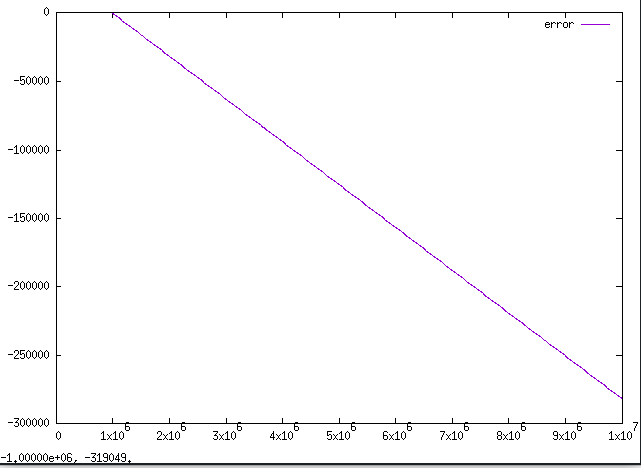

Na wykresie widać, że do pewnego momentu błąd wynosi 0, a dalej rośnie liniowo z ilością dodanych elementów

Jest to zgodne z moim przewidywaniem, do około 25000 elementów różnica rzędów wielkości akumulatora i wartości dodawanej jest na tyle mała, że wynik mieści się w reprezentacji, i nie jest zaokrąglany, natomiast później przestaje się mieścić, i musi zostać zaokrąglony by można go było spowrotem wpisać do zmiennej



Podpunkt 4 i 5
policzymy teraz sumę tablicy z wykorzystaniem rekurencji

In [6]:
ex1p4and5();

4,5)
	liczenie rekurencyjnie
	sum = 5312500.0
	v*N = 5312500.0
	błąd bezwzględny sum - v*N = 0.0
	bład względny (sum - v*N)/(v*N) = 0.0000000


Wyliczony błąd wynosi 0, jest to wynik, którego można się spodziewać, gdyż na każdym kroku algorytmu rekurencyjnego dodajemy dwie liczby o podobnym rzędzie wielkości



Podpunkt 6
z wykorzystaniem std::chrono::high_resolution_clock zmierzymy czas wykonania 100 powtórzeń sumy iteracyjniej i rekurencyjnej

In [7]:
ex1p6();

6)
mierzenie czasu
	wykonano 100 powtórzeń
	dodawanie iterowane zajeło 2594535034 ns
	dodawanie rekurencyjne zajeło 7018031435 ns


Jak widać algorytm rekurencyjny wykonuje się prawie 3 razy wolniej



Podpunkt 7
policzymy błąd przy dodawaniu rekurencyjnie specjalnie przygotowanej tablicy

In [8]:
ex1p7();

7)
	przykład danych, dla których rekurencja ma niezerowy błąd
	wartość tablicy
	tab[0] = 1000000000.0000000
	tab[1] = 1000000000.0000000
	tab[2] = 0.5000000
	tab[3] = 0.5000000
	tab[4] = 100000000.0000000
	tab[5] = -100000000.0000000
	tab[6] = -0.5000000
	tab[7] = 0.5000000
	tab[8] = -10000000.0000000
	tab[9] = 10000001.0000000
	tab[10] = -0.5000000
	tab[11] = 0.5000000
	tab[12] = -10000000.0000000
	tab[13] = 1000001.0000000
	tab[14] = 0.0500000
	tab[15] = -0.5000000
	wartość wyliczona = 1991000064.0000000
	wartość dokładna = 1991000064.0000000
	wartość błędu (wyliczone - dokładne) = 0.0000000


## Zadanie 2

Podpunkt 1
policzymy sumę tablicy z wykorzystaniem algorytmu Kahana

In [9]:
ex2p1();

1)
	sum = 5312500.0
	v*N = 5312500.0
	błąd bezwzględny sum - v * N = 0.0
	błąd względny (sum - v*N)/(v*N) = 0.0000


Tak samo jak przy obliczaniu rekurencyjnym błąd wynosi 0

Podpunkt 2
Algorytm kahana zachowuje się dużo lepiej numerycznie, dlatego że w przeciwieństwie do algorytmu iteracyjnego kompensuje straty dokładności na niskich bitach

Zmienna err przechowywuje wartość o którą kompensujemy (utracone niskie bity)



Podpunkt 3

In [10]:
ex2p3();

3)
mierzenie czasu
	wykonano 100 powtórzeń
	dodawanie kahana zajeło 8754107179 ns
	dodawanie rekurencyjne zajeło 7004072595 ns


Algorytm kahana jest troszkę wolniejszy od algorytmu rekurencyjnego, ale wymaga O(1) pamięci, a nie O(log(N)) jak algorytm rekurencyjny, dodatkowo jest on odporny na przepełnienie stosu

## Zadanie 3


Wyliczymy wartości funkcji dzeta i eta dla s = 2, 3.6667, 5, 7.2, 10 oraz n = 50, 100, 200, 500, 1000 w przód i w tył z pojedyńczą i podwójną precyzją i porównamy wyniki ze sobą i z dużo dokładniejszym przybliżeniem

In [11]:
ex3();

funkcja dzeta do przodu float s\n
1.62513291835785	1.63498401641846	1.63994669914246	1.64293599128723	1.64393484592438	
1.10939943790436	1.10940861701965	1.10940861701965	1.10940861701965	1.10940861701965	
1.03692746162415	1.03692746162415	1.03692746162415	1.03692746162415	1.03692746162415	
1.00722765922546	1.00722765922546	1.00722765922546	1.00722765922546	1.00722765922546	
1.00099456310272	1.00099456310272	1.00099456310272	1.00099456310272	1.00099456310272	
funkcja dzeta do tyłu float s\n
1.62513267993927	1.63498389720917	1.63994646072388	1.64293599128723	1.64393448829651	
1.10939979553223	1.10940885543823	1.10941028594971	1.10941052436829	1.10941052436829	
1.03692770004272	1.03692770004272	1.03692770004272	1.03692770004272	1.03692770004272	
1.00722765922546	1.00722765922546	1.00722765922546	1.00722765922546	1.00722765922546	
1.00099456310272	1.00099456310272	1.00099456310272	1.00099456310272	1.00099456310272	
funkcja dzeta do przodu double s\n
1.62513273362153	1.63498390018489	1.639

Róznice pomiędzy liczeniem w przód i w tył uwidaczniają się na poziomie precyzji reprezentacji

Róznice pomiędzy pojedyńczą precyzją i podwójną precyzją uwidaczniają się na poziomie pojedyńczej precyzji, tzn. róznią się o wartości niewiele większe od dokładności pojedyńczej precyzji



wartość błędu się zmniejsza wraz ze wzrostem s dla funkcji dzeta

błąd funkcji dzeta(2) jest na poziomie 0.05%

spodziewałem się, że funkcja dzeta będzie bardziej dokładna od funkcji eta, gdyż dodajemy tam same liczby dodatnie, a nie na przemian liczby dodatnie i ujemne o zbliżonym rzędzie wielkości, jednakże jest dokładnie na odwrót

tak samo jak z kierunkiem sumowania, spodziewałem się, że skoro od końca sąsiednie liczby są różnią się o mniej, to ich dodawanie będzie bardziej dokładne



## Zadanie 4
3.775
do rysowania wykresów najpierw wykonamy 1000 iteracji dla "ustabilizowania" pojawiających się wartości xn, a następnie zapiszemy wartości kolejnego 1000 iteracji

narysujemy wykresy dla 4 róznych wartości x0

In [12]:
ex4p1();

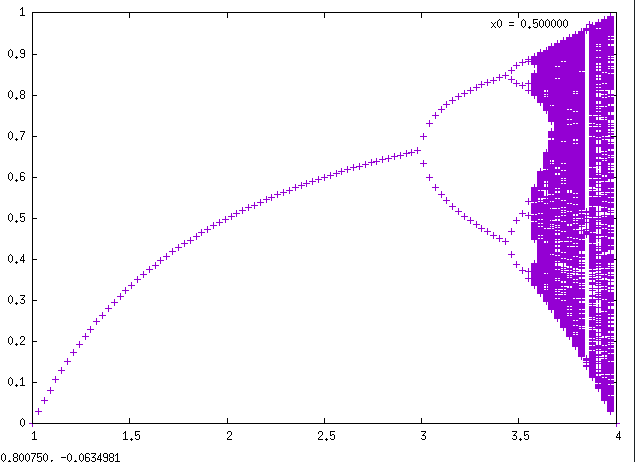
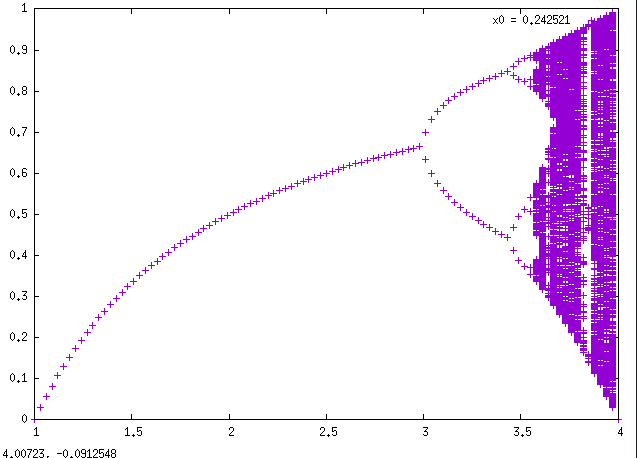
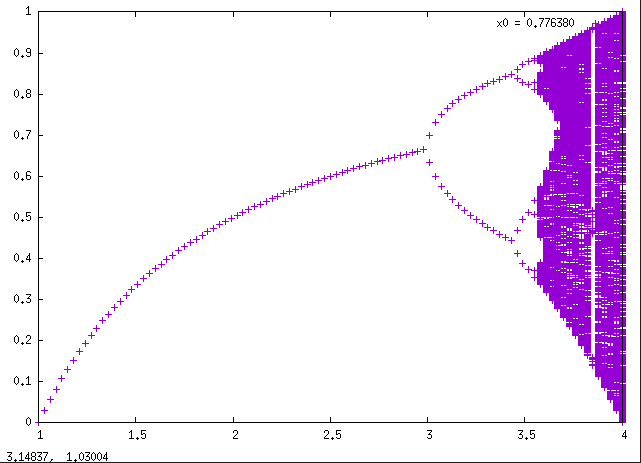
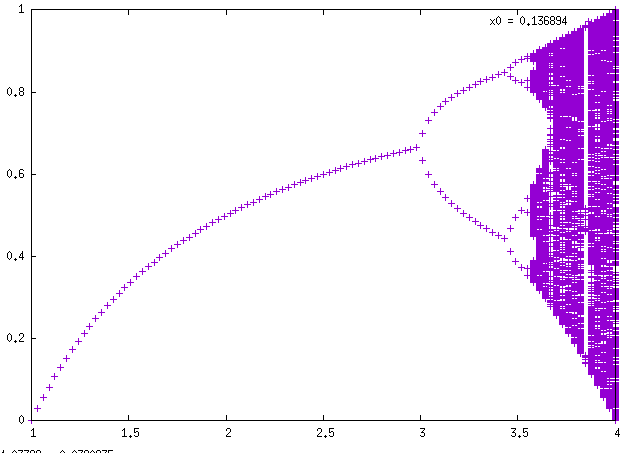

jak widać na wykresach niezależnie od początkowej wartości x0 ciąg zawsze zbiega do tych samych wartości cyklicznych, i powstaje diagram bifurkacyjny


narysujemy wykresy dla wartości r pomiędzy 3.75 i 3.8 z pojedyńczą i podwójną precyzją

In [13]:
ex4p2();

z podwójną precyzją
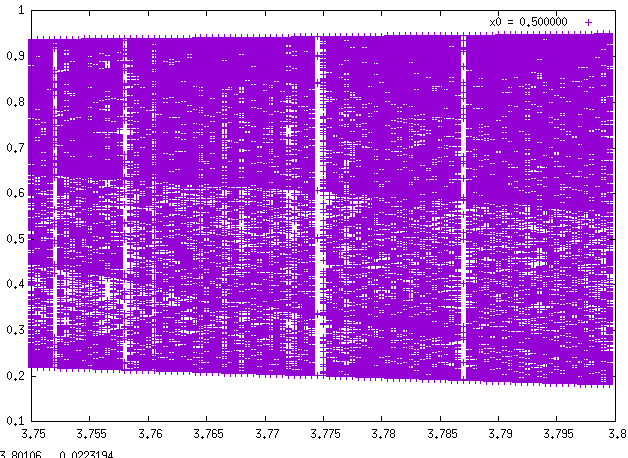
z pojedyńczą precyzją
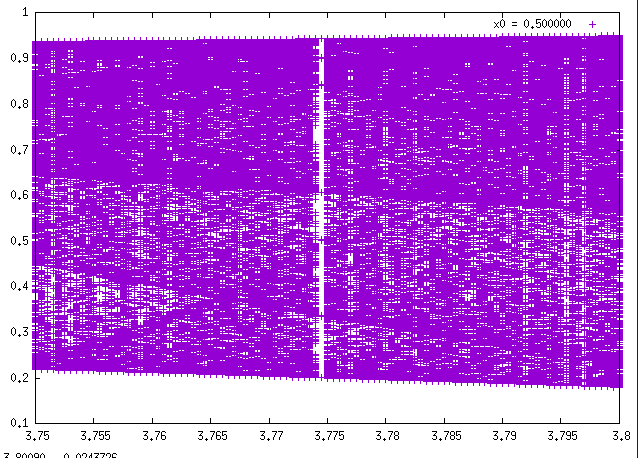

na obu diagramach widać charakterystyczne "pasma uporzątkowane"
w przypadku podwójnej precyzji są one bardziej wyraźne
jest to spowodwowane wyższą dokładnością obliczeń w przypadku powójnej precyzji


znajdziemy przy której iteracji (w śród pierwszyego 1000 000) xn będzie miał wartość najbliższą 0

In [14]:
ex4p3();

osiągnięto najmniejszą wartość fabs(x) = 0.00000000000000 po 2 iteracjach dla  x0 = 0.5
osiągnięto najmniejszą wartość fabs(x) = 0.00000000000000 po 499 iteracjach dla  x0 = 0.242521
osiągnięto najmniejszą wartość fabs(x) = 0.00000000000000 po 2013 iteracjach dla  x0 = 0.77638
osiągnięto najmniejszą wartość fabs(x) = 0.00000047683710 po 2260 iteracjach dla  x0 = 0.1368936
osiągnięto najmniejszą wartość fabs(x) = 0.00000047683710 po 1235 iteracjach dla  x0 = 0.501


Narysujmy wykres ilości wymaganych iteracji od wartości x0
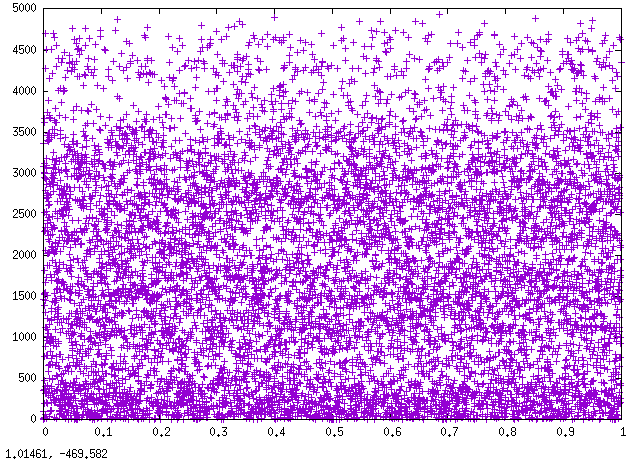
Widać tutaj, że małe zmiany x0 powodują z bardzo duże zmiany w ilości wymaganych iteracji